In [1]:
from util import plot_programs_by_project_simple, plot_n_line_graph, get_cycle_counts

## Machine Spec

local Ubuntu 24.04 Desktop PC
- 8 vCPUs
- 192 GB RAM
- 1 x NVIDIA RTX 5090
- 32 GB GPU Memory

## Project Overview

|Project|Architecture|Proof System|Continuation|GPU Acceleration|
|-|-|-|-|-|
|SP1 v4.1.2|vRAM-style|FRI-STARK(Plonky3)|o|o|
|RISC Zero v1.2.2|vRAM-style|FRI-STARK|o|o|
|ZKM #262318f|vRAM-style|FRI-STARK(Plonky2)|o|x|
|Novanet v0.1.0|vRAM-style|Nebula-Nova|o|x|
|Ceno (not yet)|vRAM-style|GKR|o|x|
|OpenVM v1.0.0-rc.2|Modular-style|FRI-STARK(Plonky3)|o|x|
|Jolt v0.1.0|Modular-style|Lasso Lookup Argument|x|△|
|Nexus v0.2.3|Modular-style|Nova|o|x|
|Pico|Modular-style|FRI-STARK(Plonky3)|o|x|

- vRAM-style: executes custom circuits defined for each type of instruction like CPU/Memory/Branch in data parallel.
- Modular-style: executes custom circuits defined for each instruction such as add/mul/sw

## Program vs Cycle Counts

In [2]:
cycle_table = get_cycle_counts(
    selected_projects=[
        "sp1turbo", "risczero", "zkm", "novanet",
        "openvm", "jolt", "nexus", "pico"
    ],
)

cycle_table

,Project,Proof System,fib (n=100000),sha2 (n=2048),ecdsa (n=1),ethtransfer (n=100)
0,sp1turbo,FRI-STARK,"609,065","4,404,065","4,431,588","5,292,348"
1,risczero,FRI-STARK,"2,402,874","122,692","332,065","4,567,341"
2,openvm,FRI-STARK,N/A,N/A,N/A,N/A
3,pico,FRI-STARK,N/A,N/A,N/A,N/A
4,zkm,FRI-STARK,"2,700,193","166,583","7,476,379","5,602,566"
5,jolt,Lasso Lookup,"2,401,044","200,948","5,587,080","4,879,069"
6,nexus,Nova,N/A,N/A,N/A,N/A
7,novanet,Nebula-Nova,N/A,N/A,N/A,N/A


## Prover Time

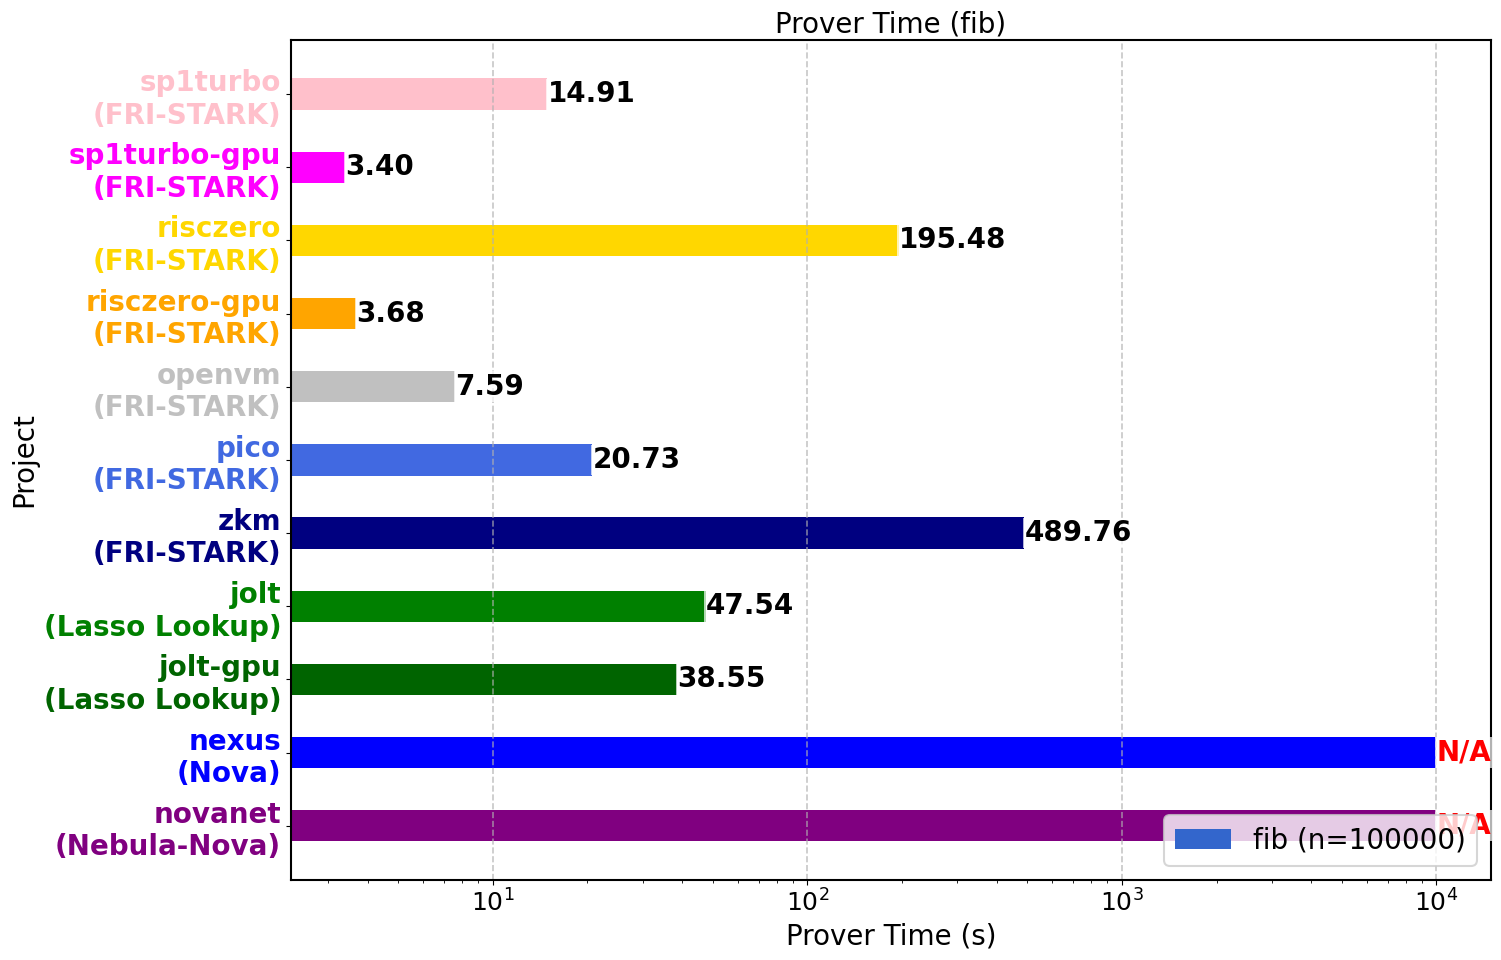

In [7]:
plot_programs_by_project_simple("prover_time", 
    selected_programs=["fib"]
)

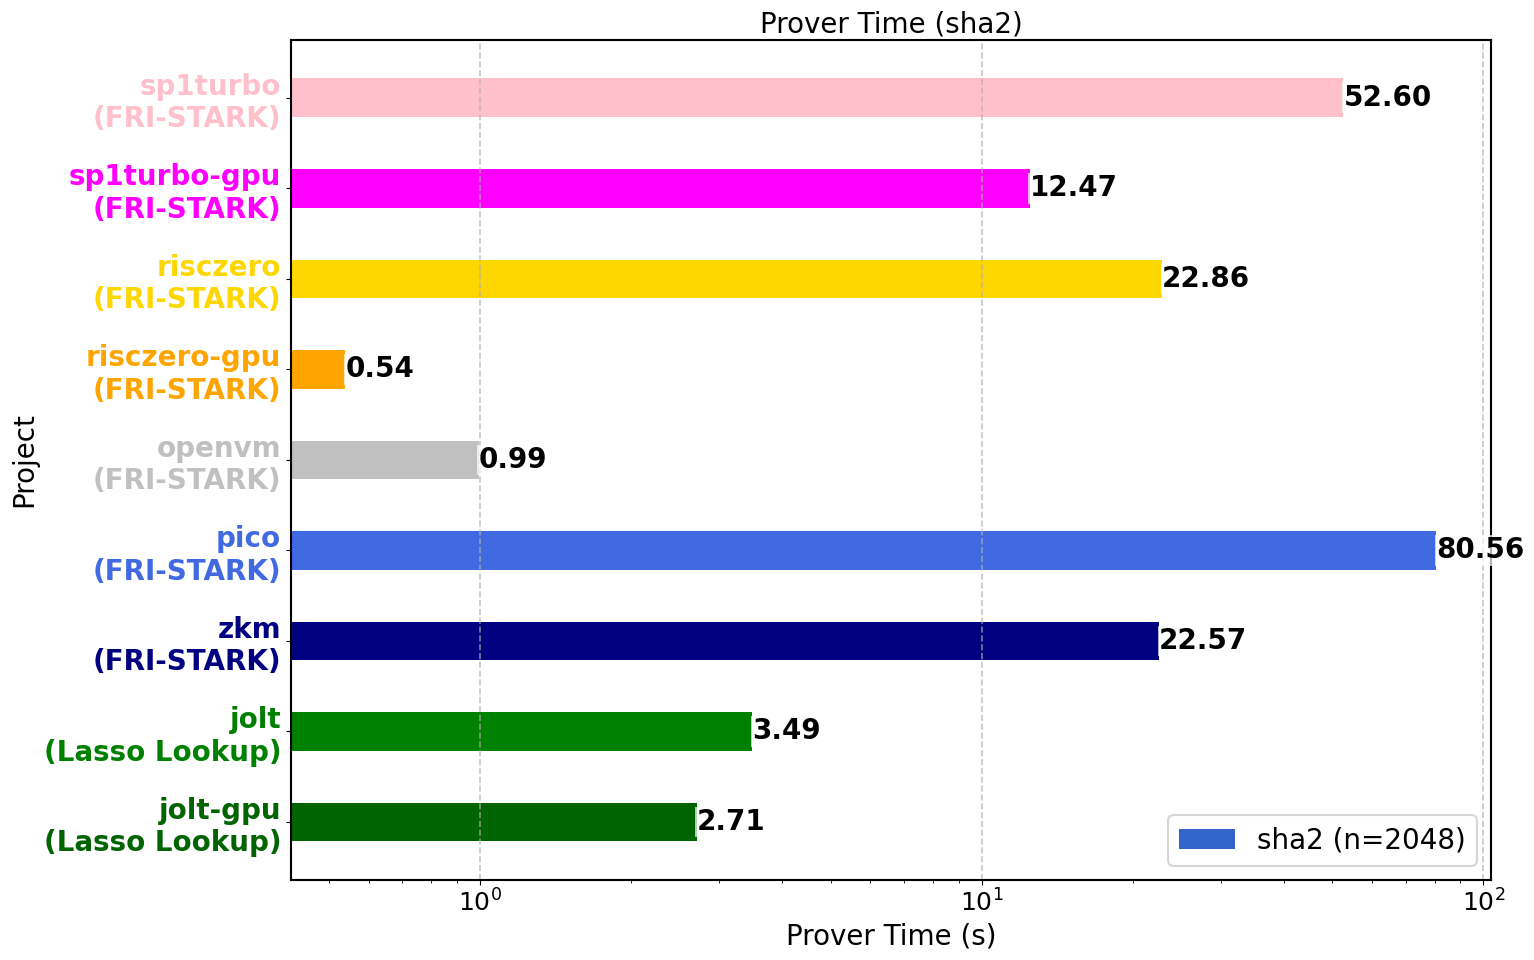

In [6]:
plot_programs_by_project_simple("prover_time", 
    selected_programs=["sha2"]
)

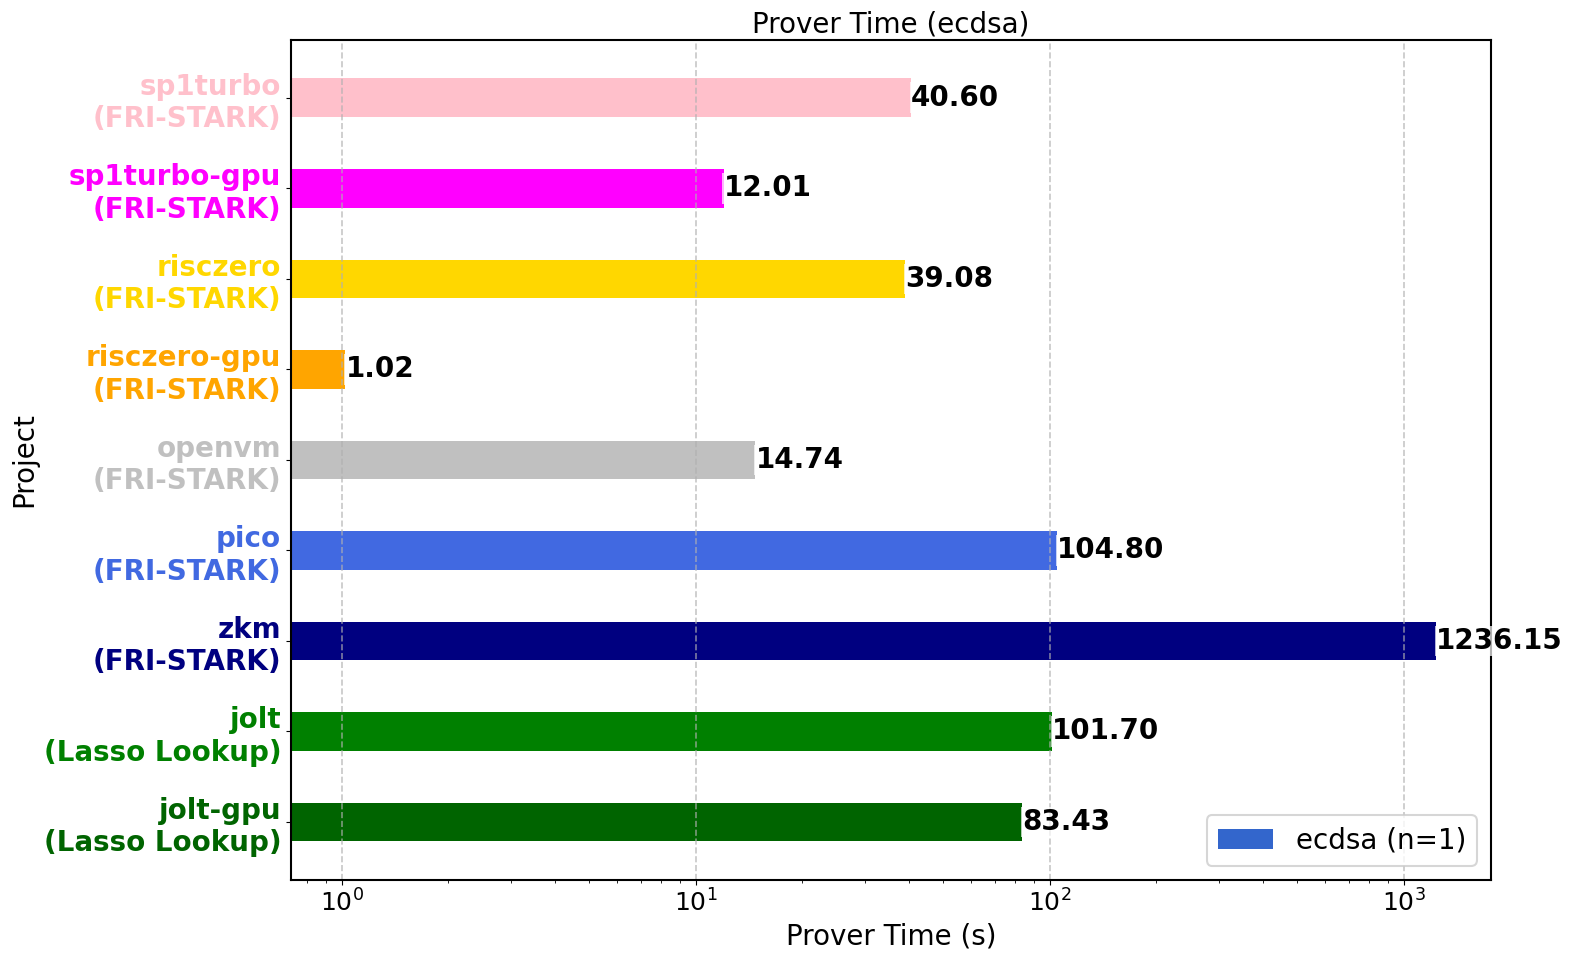

In [5]:
plot_programs_by_project_simple("prover_time", 
    selected_programs=["ecdsa"]
)

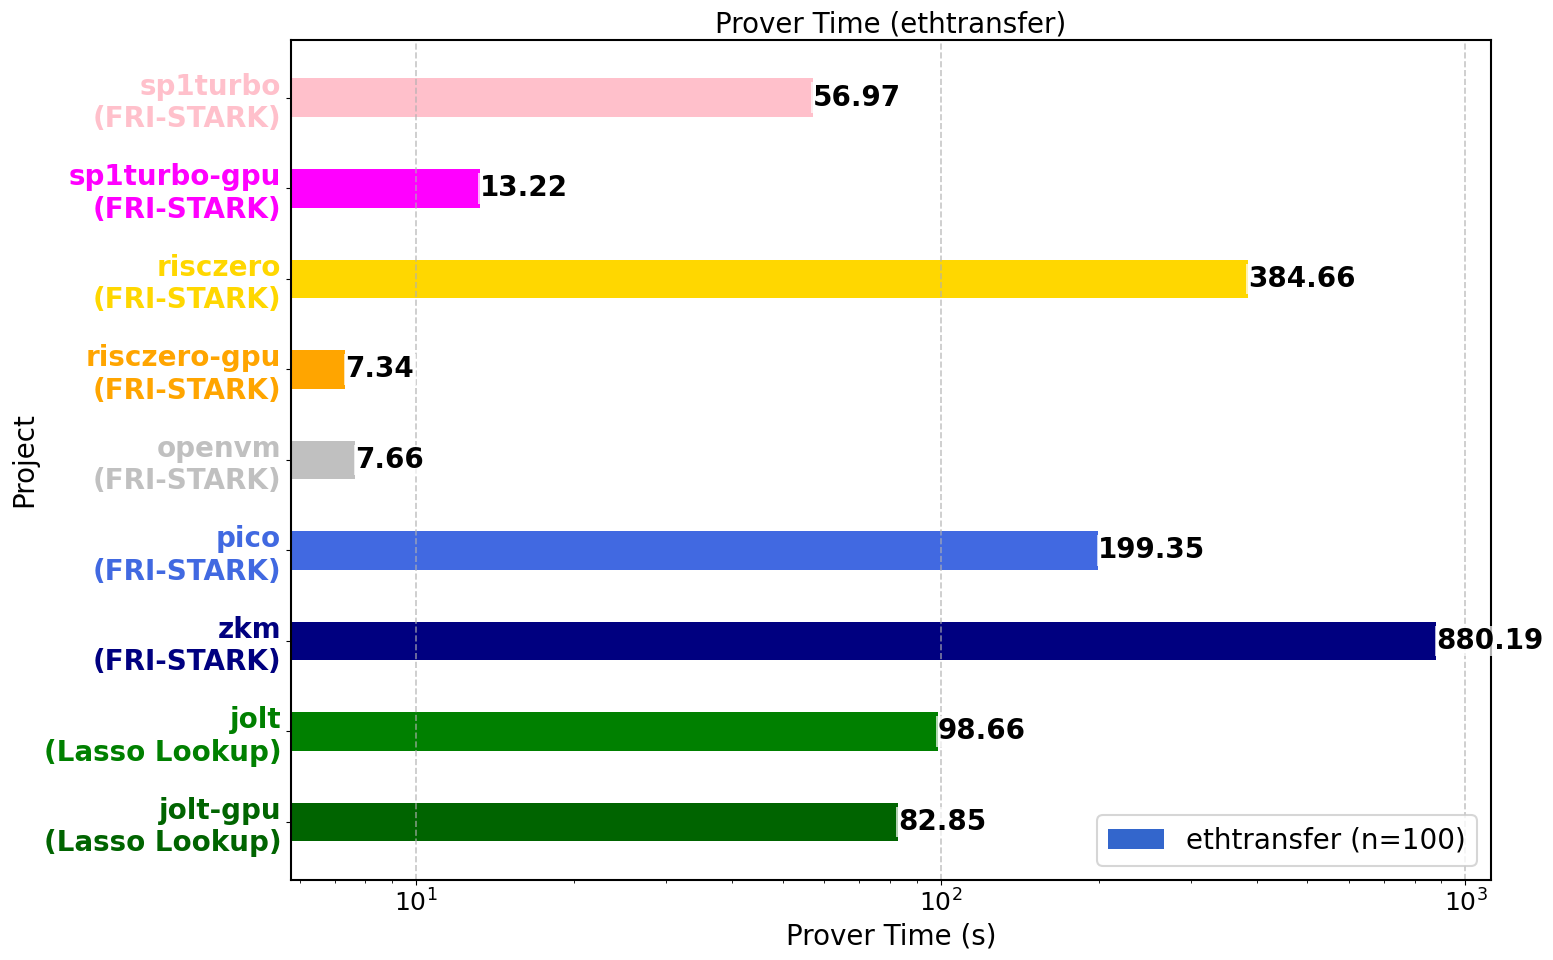

In [4]:
plot_programs_by_project_simple("prover_time", 
    selected_programs=["ethtransfer"]
)

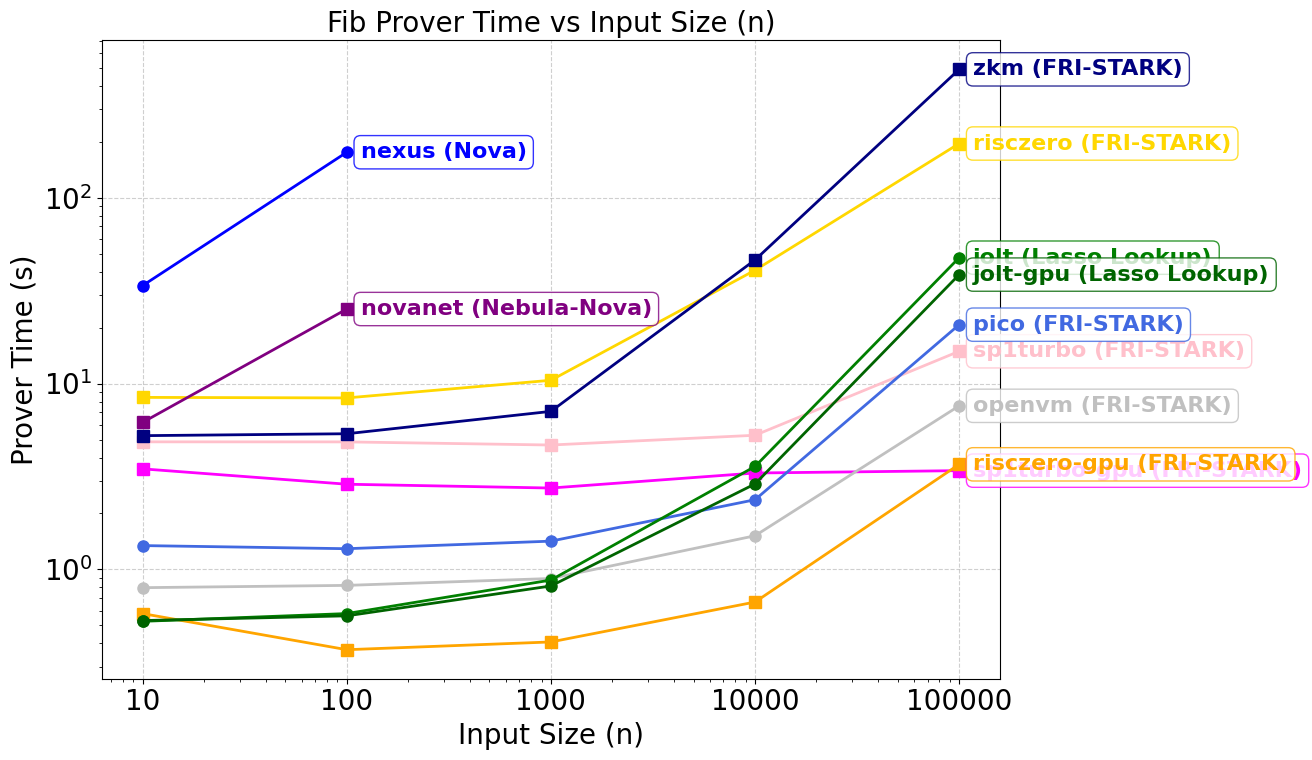

In [6]:
plot_n_line_graph("fib", n_values=[10, 100, 1000, 10000, 100000])

## Proof Size

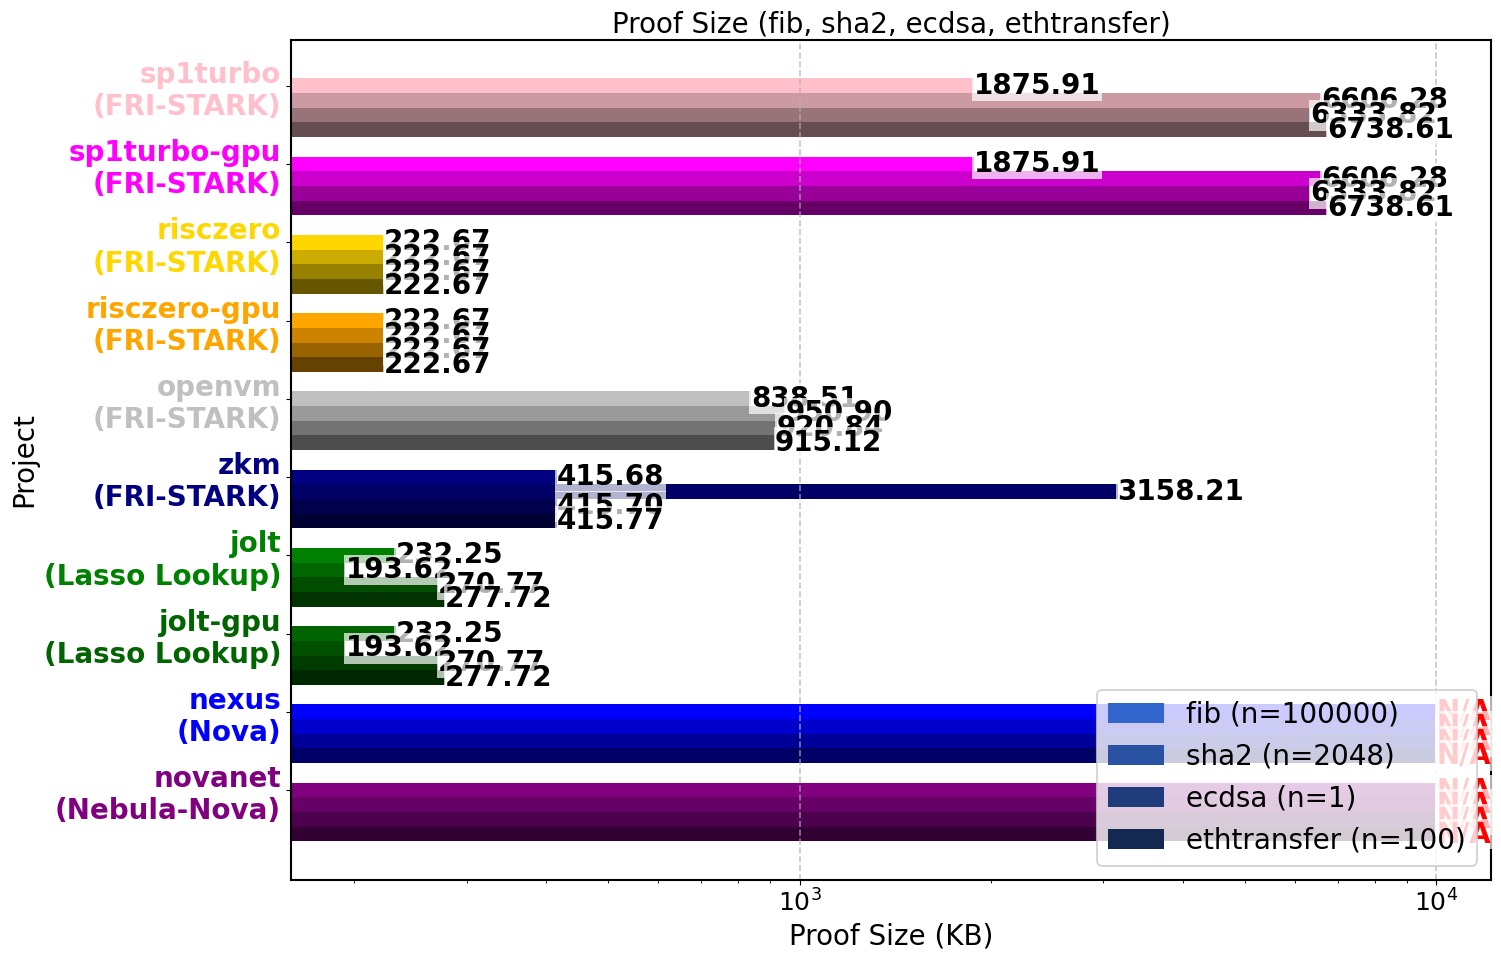

In [10]:
plot_programs_by_project_simple("proof_size", 
    selected_projects=[
        "sp1turbo", "sp1turbo-gpu", "risczero", "risczero-gpu", "zkm", "novanet",
        "openvm", "jolt", "jolt-gpu", "nexus"
    ],
)

## Peak Memory Usage

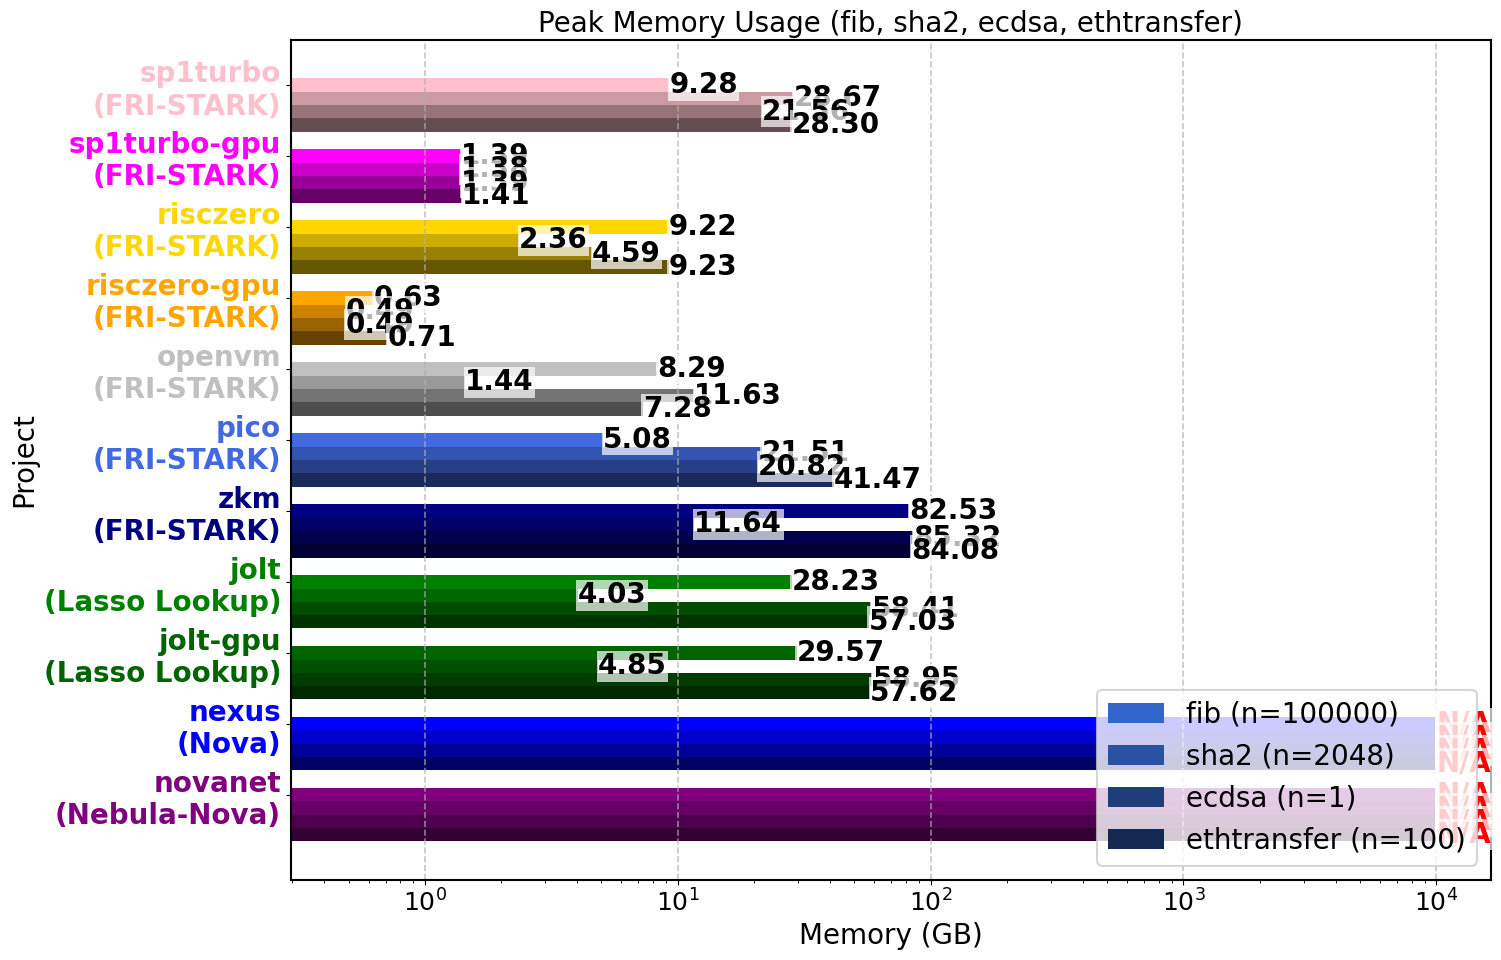

In [11]:
plot_programs_by_project_simple("peak_memory")

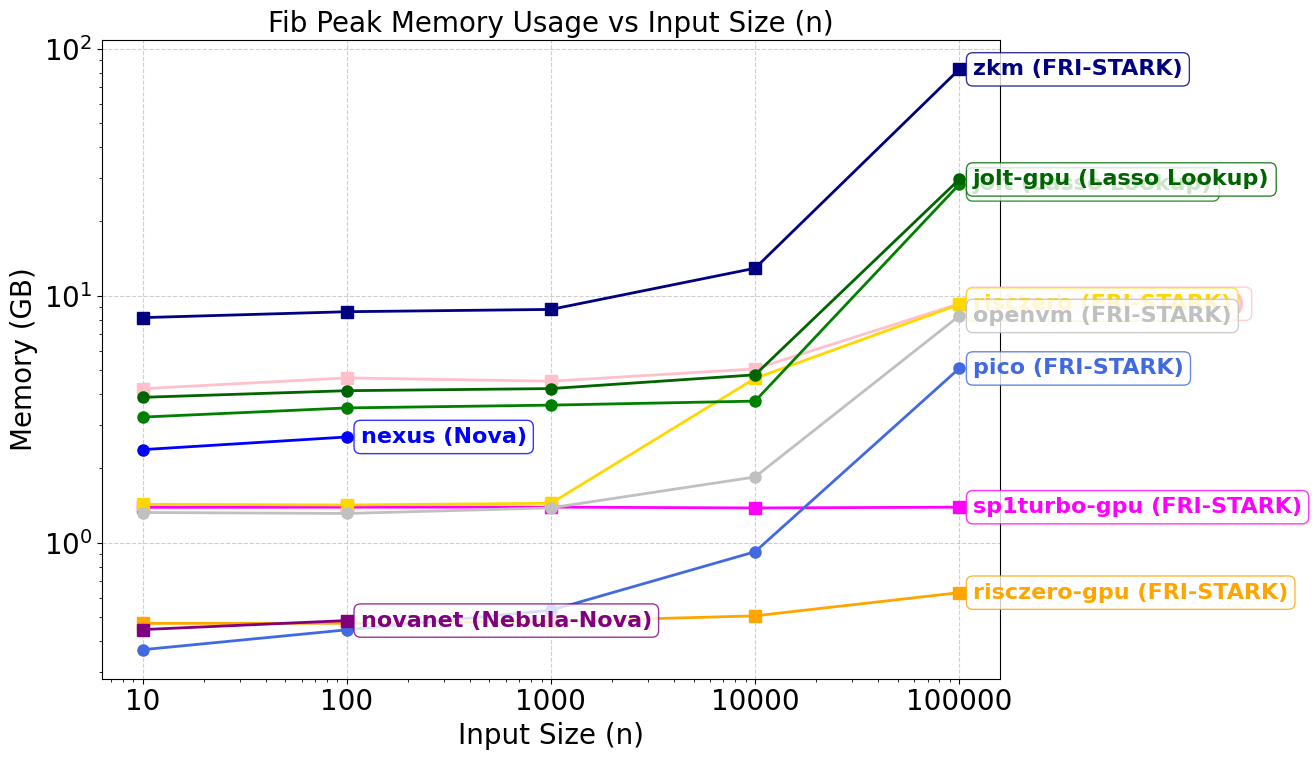

In [11]:
plot_n_line_graph(program = "fib", n_values = [10, 100, 1000, 10000, 100000], metrics="peak_memory")